In [7]:
import pandas as pd
import xarray as xr

## Explore metadata DataFluxKit



In [34]:
pd_site_fullyear = pd.read_csv(r"C:\Users\obonte\Documents\DifferentiableEvaporation\data\exp_raw\eddy_covariance\fdk_site_fullyearsequence.csv", index_col = 0)
pd_site_info = pd.read_csv(r"C:\Users\obonte\Documents\DifferentiableEvaporation\data\exp_raw\eddy_covariance\fdk_site_info.csv", index_col = 0)
print(pd_site_info.igbp_land_use.unique())    
pd_site_info.head()

['MF' 'WET' 'GRA' 'SAV' 'EBF' 'WSA' 'DBF' 'CRO' 'CSH' 'DNF' 'ENF' 'OSH'
 'SNO' 'CVM' 'WAT']


lon        lat    elv  year_start  year_end  canopy_height  \
sitename                                                                      
AR-SLu    -66.459801 -33.464802  500.0        2010      2010            4.5   
AR-TF1    -66.733500 -54.973300   40.0        2016      2018            NaN   
AT-Neu     11.317500  47.116669  970.0        2002      2012            1.0   
AU-ASM    133.248993 -22.283001  606.0        2011      2017            6.5   
AU-Cow    145.427155 -16.238190   86.0        2010      2015           22.0   

          reference_height koeppen_code igbp_land_use           whc  \
sitename                                                              
AR-SLu                11.0          Bsk            MF   2043.117798   
AR-TF1                 NaN           ET           WET   1362.212427   
AT-Neu                 3.0          Dfc           GRA    233.839340   
AU-ASM                11.6          BSh           SAV   2678.101074   
AU-Cow                35.0           Am           EBF  15894.555990   

            product c3c4  
sitename                  
AR-SLu      plumber   C3  
AR-TF1    ameriflux  NaN  
AT-Neu      plumber   C3  
AU-ASM      plumber   C3  
AU-Cow      plumber  NaN

In [45]:
forests = pd_site_info.index[pd_site_info.igbp_land_use.isin(["DBF","DNF","ENF","BNF"])]
forests_common = list(set(forests).intersection(set(pd_site_fullyear.index)))
pd_site_fullyear.loc[forests_common].sort_values("nyears_le", ascending=False).head()

start_gpp     end_gpp  year_start_gpp  year_end_gpp  nyears_gpp  \
sitename                                                                     
CH-Dav    1997-01-01  2020-12-31            1997          2020          24   
FI-Hyy    1996-06-13  2017-12-19            1997          2016          20   
DE-Tha    1996-06-29  2020-12-05            1997          2019          23   
US-MMS    1999-01-01  2020-12-31            1999          2020          22   
RU-Fyo    1998-07-05  2010-11-28            1999          2009          11   

          drop_gpp    start_le      end_le  year_start_le  year_end_le  \
sitename                                                                 
CH-Dav       False  1997-01-01  2020-12-31         1997.0       2020.0   
FI-Hyy       False  1996-04-11  2020-12-31         1997.0       2020.0   
DE-Tha       False  1996-06-29  2020-12-05         1997.0       2019.0   
US-MMS       False  1999-01-01  2020-12-31         1999.0       2020.0   
RU-Fyo       False  1998-06-01  2020-12-31         1999.0       2020.0   

          nyears_le  drop_le start_lecorr  end_lecorr  year_start_lecorr  \
sitename                                                                   
CH-Dav           24    False   1997-01-01  2013-09-28             1997.0   
FI-Hyy           24    False   2002-12-09  2019-10-26             2003.0   
DE-Tha           23    False   1996-06-29  2020-12-05             1997.0   
US-MMS           22    False   1999-01-01  2017-02-04             1999.0   
RU-Fyo           22    False   1998-06-01  2020-12-31             1999.0   

          year_end_lecorr  nyears_lecorr  drop_lecorr  
sitename                                               
CH-Dav             2012.0             16        False  
FI-Hyy             2018.0             16        False  
DE-Tha             2019.0             23        False  
US-MMS             2016.0             18        False  
RU-Fyo             2020.0             22        False

In [29]:
crop_sites = pd_site_info.index[pd_site_info.igbp_land_use == "CRO"]
pd_site_fullyear.loc[crop_sites].sort_values("nyears_le", ascending=False).head()

start_gpp     end_gpp  year_start_gpp  year_end_gpp  nyears_gpp  \
sitename                                                                     
US-Ne1    2001-05-31  2020-12-31            2002          2020          19   
DE-Geb    2001-01-15  2020-12-31            2002          2020          19   
CH-Oe2    2004-01-07  2020-12-31            2005          2020          16   
BE-Lon    2004-04-01  2020-12-31            2005          2020          16   
IT-BCi    2004-05-01  2020-12-31            2005          2020          16   

          drop_gpp    start_le      end_le  year_start_le  year_end_le  \
sitename                                                                 
US-Ne1       False  2001-05-25  2020-12-31         2002.0       2020.0   
DE-Geb       False  2001-01-15  2020-12-31         2002.0       2020.0   
CH-Oe2       False  2004-01-01  2020-12-31         2004.0       2020.0   
BE-Lon       False  2004-04-01  2020-12-31         2005.0       2020.0   
IT-BCi       False  2004-05-01  2020-12-31         2005.0       2020.0   

          nyears_le  drop_le start_lecorr  end_lecorr  year_start_lecorr  \
sitename                                                                   
US-Ne1           19    False          NaN         NaN                NaN   
DE-Geb           19    False   2001-01-15  2020-12-31             2002.0   
CH-Oe2           17    False          NaN         NaN                NaN   
BE-Lon           16    False   2004-04-01  2019-12-13             2005.0   
IT-BCi           16    False   2004-05-01  2012-11-23             2005.0   

          year_end_lecorr  nyears_lecorr  drop_lecorr  
sitename                                               
US-Ne1                NaN              0         True  
DE-Geb             2020.0             19        False  
CH-Oe2                NaN              0         True  
BE-Lon             2018.0             14        False  
IT-BCi             2011.0              7        False

In [70]:
crop_sites = pd_site_info.index[pd_site_info.igbp_land_use == "SAV"]
pd_site_fullyear.loc[crop_sites].sort_values("nyears_le", ascending=False).head()

start_gpp     end_gpp  year_start_gpp  year_end_gpp  nyears_gpp  \
sitename                                                                     
AU-DaS    2011-04-09  2017-12-31            2012          2017           6   
ES-LM1    2014-03-14  2020-12-31            2015          2020           6   
ES-LM2    2014-03-14  2020-12-31            2015          2020           6   
AU-ASM    2011-10-15  2017-12-13            2012          2016           5   
AU-GWW    2013-01-01  2017-12-31            2013          2017           5   

          drop_gpp    start_le      end_le  year_start_le  year_end_le  \
sitename                                                                 
AU-DaS       False  2011-04-08  2017-12-31         2012.0       2017.0   
ES-LM1       False  2014-03-14  2020-12-31         2015.0       2020.0   
ES-LM2       False  2014-03-14  2020-12-31         2015.0       2020.0   
AU-ASM       False  2011-01-09  2017-12-13         2012.0       2016.0   
AU-GWW       False  2013-01-01  2017-12-31         2013.0       2017.0   

          nyears_le  drop_le start_lecorr  end_lecorr  year_start_lecorr  \
sitename                                                                   
AU-DaS            6    False   2012-12-18  2017-12-31             2013.0   
ES-LM1            6    False   2014-03-14  2020-12-31             2015.0   
ES-LM2            6    False   2014-03-14  2020-12-31             2015.0   
AU-ASM            5    False   2011-01-09  2017-12-13             2012.0   
AU-GWW            5    False   2013-01-01  2017-12-31             2013.0   

          year_end_lecorr  nyears_lecorr  drop_lecorr  
sitename                                               
AU-DaS             2017.0              5        False  
ES-LM1             2020.0              6        False  
ES-LM2             2020.0              6        False  
AU-ASM             2016.0              5        False  
AU-GWW             2017.0              5        False

(11109.0, 18985.0)

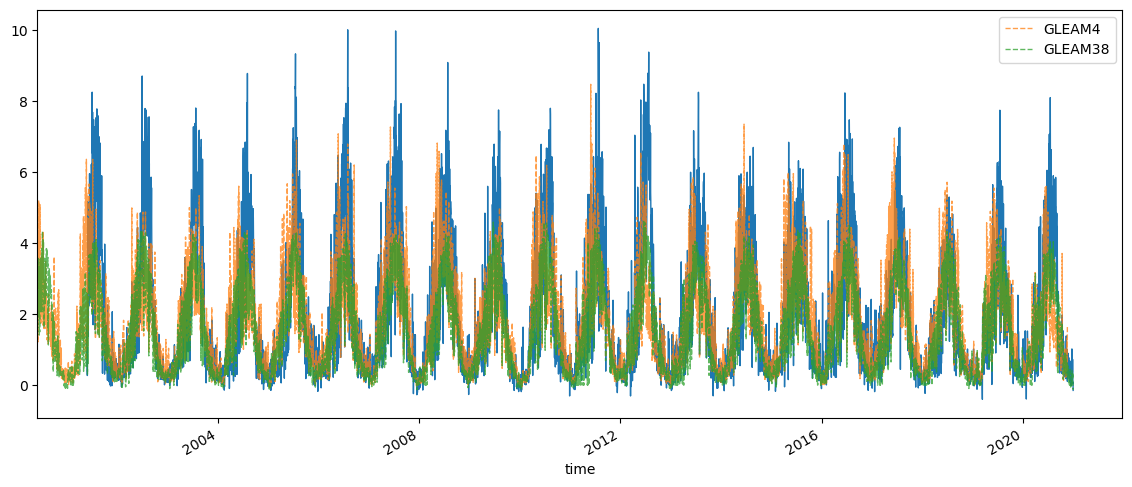

In [69]:
import matplotlib.pyplot as plt
pd_us_ne1 = pd.read_csv("874_US-Ne1_LE_1_1_1_all.txt", index_col=0, parse_dates =True)
fig, ax = plt.subplots(figsize = (14,6))
pd_us_ne1["insitu"].dropna().plot(linewidth = 1, ax = ax)
xlim = ax.get_xlim()
pd_us_ne1[["GLEAM4","GLEAM38"]].plot(linestyle = "dashed", linewidth = 1, alpha = 0.75, ax = ax)
ax.set_xlim(xlim)

In [64]:
pd_us_ne1["insitu"].dropna()

time
2001-05-25    1.637922
2001-05-26    0.917316
2001-05-27    0.771635
2001-05-28    0.743554
2001-05-29    0.270115
                ...   
2020-12-27    0.724605
2020-12-28    0.437121
2020-12-29    0.059934
2020-12-30    0.070221
2020-12-31   -0.148912
Name: insitu, Length: 6981, dtype: float64

## Random 

In [2]:
# ds = xr.open_dataset(r"C:\Users\obonte\Documents\DifferentiableEvaporation\data\exp_pro\eddy_covariance\BE-Bra.nc")
ds = xr.open_dataset(r"C:\Users\obonte\Documents\DifferentiableEvaporation\data\exp_raw\eddy_covariance\BE-Bra_1996-2020_FLUXDATAKIT_Flux.nc")

In [3]:
ds.time

<xarray.DataArray 'time' (time: 438336)> Size: 4MB
array(['1996-01-01T00:00:00.000000000', '1996-01-01T00:30:00.000000000',
       '1996-01-01T01:00:00.000000000', ..., '2020-12-31T22:30:00.000000000',
       '2020-12-31T23:00:00.000000000', '2020-12-31T23:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 4MB 1996-01-01 ... 2020-12-31T23:30:00
Attributes:
    long_name:      time
    info:           Time stamp indicates start time
    time_zone:      Europe/Brussels
    standard_name:  time

In [4]:
path = r"C:\Users\obonte\Documents\DifferentiableEvaporation\data\exp_raw\eddy_covariance\FLX_BE-Bra_FLUXNET2015_FULLSET_1996-2020_beta-3\FLX_BE-Bra_FLUXNET2015_FULLSET_HH_1996-2020_beta-3.csv"
df = pd.read_csv(path, na_values = -9999, index_col = 0, date_format="%Y%m%d%H%M")

<Axes: xlabel='TIMESTAMP_START'>

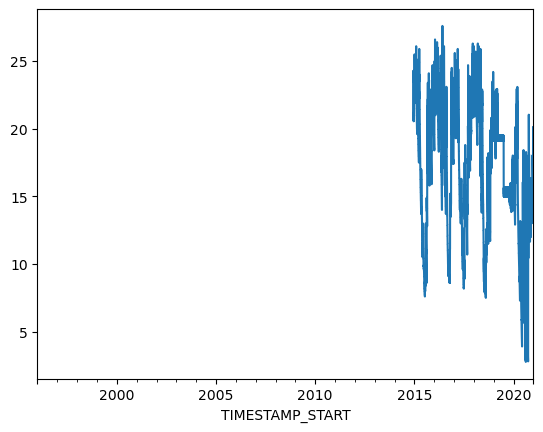

In [5]:
df["SWC_F_MDS_2"].plot()

In [6]:
df["SWC_F_MDS_2_QC"].plot()

<Axes: xlabel='TIMESTAMP_START'>

Error in callback <function flush_figures at 0x000001EE4CEF1120> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [12]:
import requests

In [8]:
response = requests.get('https://data.icos-cp.eu/objects/KAwldGoiEpQUhNLhtpQiuunn')
# Checking if the request was successful
if response.status_code == 200:
    # Saving the content to a file
    with open('downloaded_file.zip', 'wb') as file:
        file.write(response.content)
    print("File downloaded successfully.")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

File downloaded successfully.


In [14]:
import hvplot.pandas
df["G_F_MDS"].hvplot()

:Curve   [TIMESTAMP_START]   (G_F_MDS)

In [18]:
df["G_F_MDS"].resample("1D").mean().loc["2015"].hvplot()

:Curve   [TIMESTAMP_START]   (G_F_MDS)

In [26]:
df["G_F_MDS"].loc["2012-06-01"].hvplot() * df["NETRAD"].loc['2012-06-01'].hvplot()

:Overlay
   .Curve.G_F_MDS :Curve   [TIMESTAMP_START]   (G_F_MDS)
   .Curve.NETRAD  :Curve   [TIMESTAMP_START]   (NETRAD)

In [23]:
df["NETRAD"].resample("1D").mean().loc["2013"].hvplot()

:Curve   [TIMESTAMP_START]   (NETRAD)